# ☀️ Solar Data Discovery – Benin EDA
**Objective:**  
Perform profiling, cleaning, and exploratory analysis on Benin’s solar dataset to understand data quality, detect trends, and identify insights relevant to solar energy potential.

**Key Tasks:**
- Summary statistics & missing-value report  
- Outlier detection and cleaning  
- Time-series and correlation analysis  
- Wind, temperature, and humidity analysis  
- Data-driven insights summary


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_csv("../data/benin-malanville.csv")

# Preview first few rows
print("Dataset Overview:")
display(df.head())
df.info()



Dataset Overview:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
# --- Part 1: Summary Statistics & Missing Values ---
print("\n🔍 Missing Values Report:")
missing_count = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percent}).sort_values(by='Missing %', ascending=False)
display(missing_df[missing_df['Missing Count'] > 0])

print("\nColumns with >5% missing values:")
display(missing_df[missing_df['Missing %'] > 5])

print("\nSummary Statistics for Numeric Columns:")
display(df.describe())


🔍 Missing Values Report:


,Missing Count,Missing %
Comments,525600,100.0



Columns with >5% missing values:


,Missing Count,Missing %
Comments,525600,100.0



Summary Statistics for Numeric Columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [16]:
# --- Part 2: Outlier Detection & Basic Cleaning ---
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outlier_mask = (z_scores > 3).any(axis=1)
print(f"\nDetected {outlier_mask.sum()} extreme outlier rows out of {len(df)} total.")

# Option 1: Replace outliers with median
for col in key_cols:
    median_val = df[col].median()
    df.loc[z_scores[:, key_cols.index(col)] > 3, col] = median_val

# Impute remaining missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

print("\n✅ Outliers handled and missing values imputed.")


Detected 3708 extreme outlier rows out of 525600 total.

✅ Outliers handled and missing values imputed.


c:\Users\naima\Desktop\10Academy\KAIM8\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


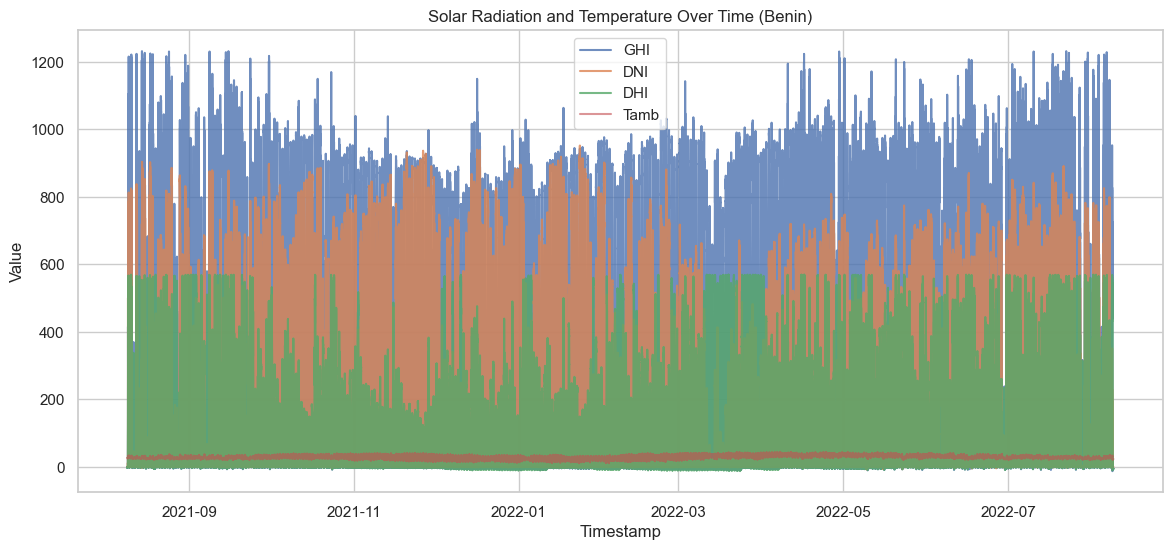

In [17]:

# --- Part 3: Time Series Analysis ---
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
plt.figure(figsize=(14,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', alpha=0.8)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', alpha=0.8)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', alpha=0.8)
if 'Tamb' in df.columns:
    plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', alpha=0.6)
plt.legend()
plt.title('Solar Radiation and Temperature Over Time (Benin)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

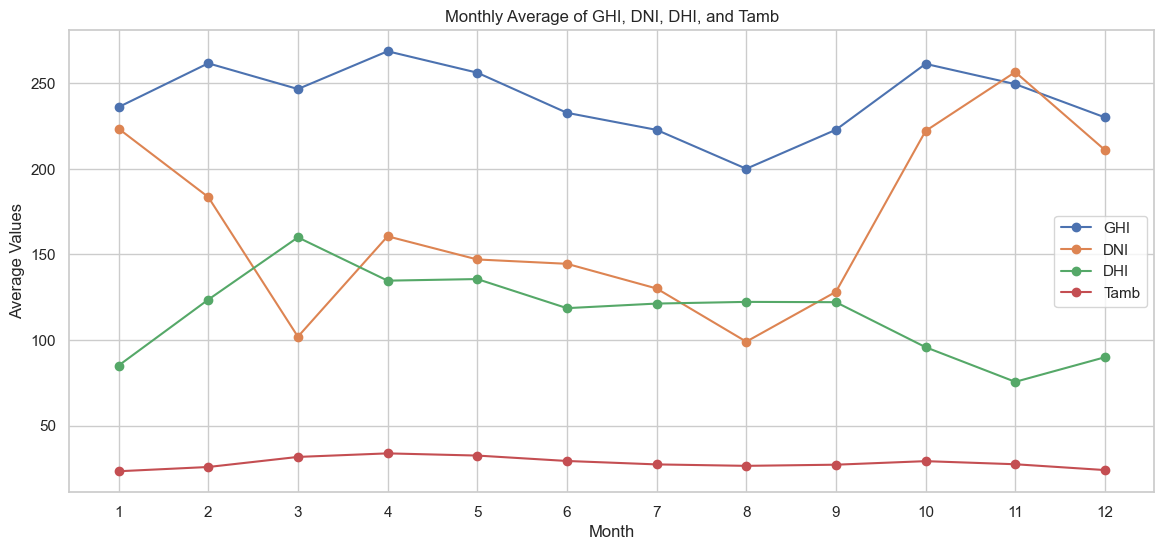

In [4]:
# Add a 'Month' column to the DataFrame (use the Timestamp column, not the RangeIndex)
df['Month'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.month

# Calculate the monthly average for each variable
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot the monthly averages
monthly_avg.plot(kind='line', figsize=(14, 6), marker='o')

# Set plot title and labels
plt.title("Monthly Average of GHI, DNI, DHI, and Tamb")
plt.xlabel("Month")
plt.ylabel("Average Values")
plt.xticks(range(1,13))  # ensure months 1-12 shown

# Display the plot
plt.show()

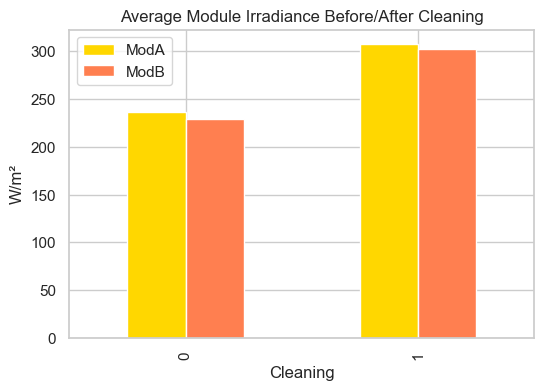

In [24]:
if 'Cleaning' in df.columns:
    avg_mod = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    avg_mod.plot(kind='bar', figsize=(6,4), color=['#FFD700','#FF7F50'])
    plt.title("Average Module Irradiance Before/After Cleaning")
    plt.ylabel("W/m²")
    plt.show()
else:
    print("No 'Cleaning' column found — skipping this plot.")


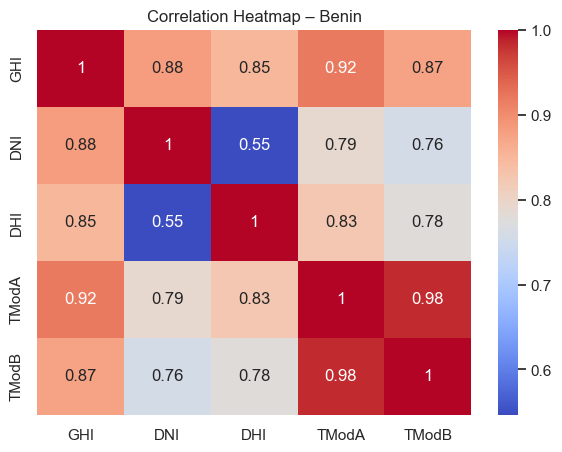

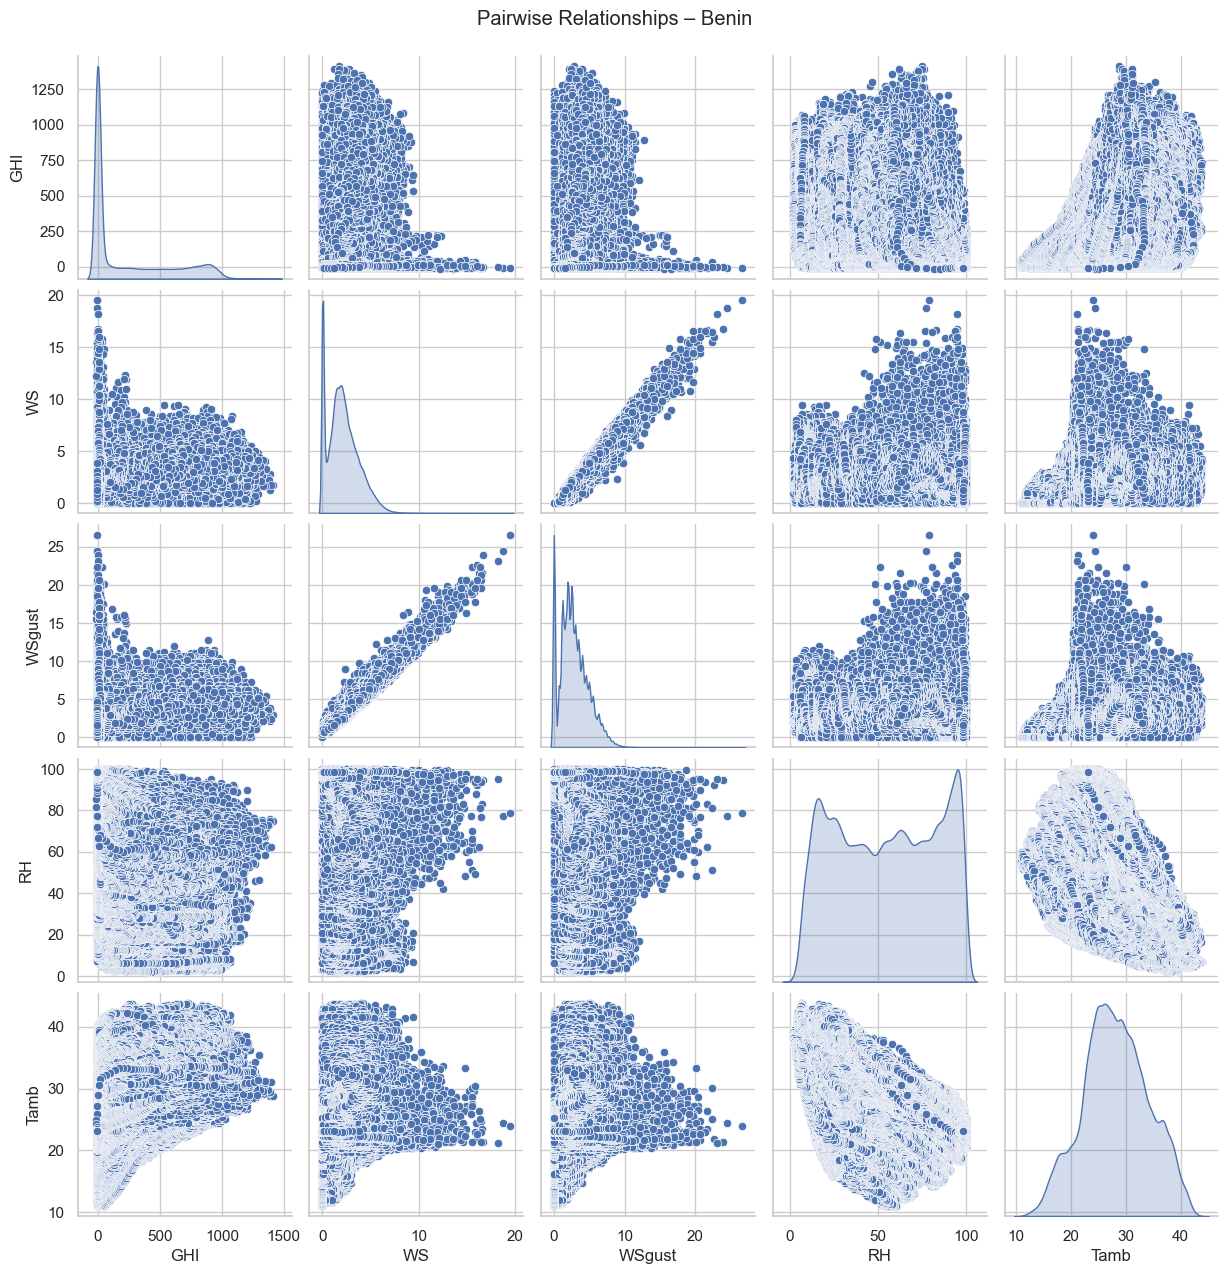

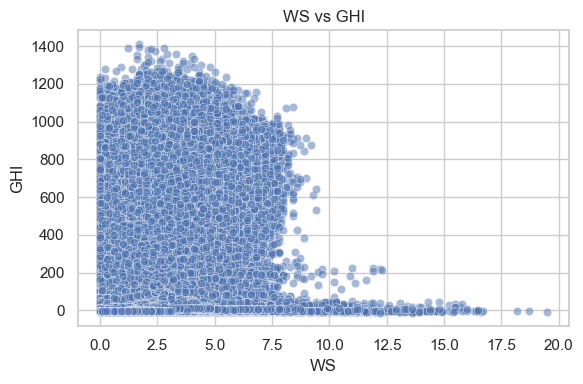

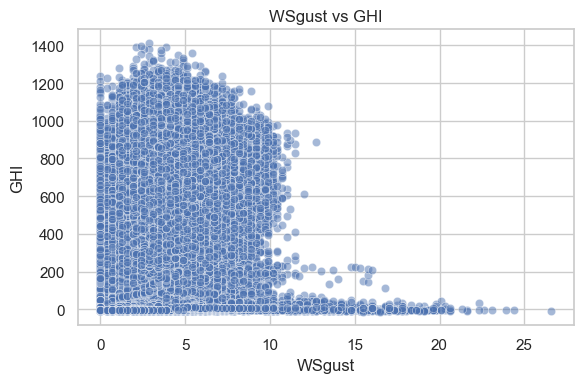

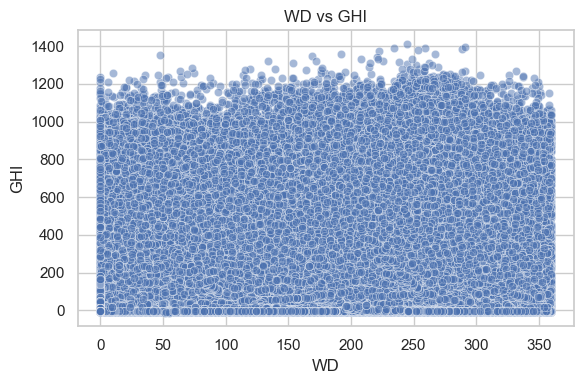

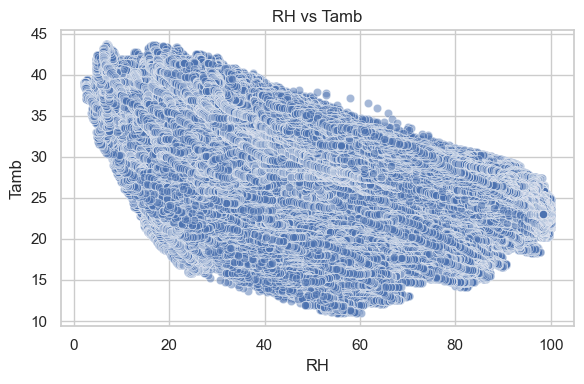

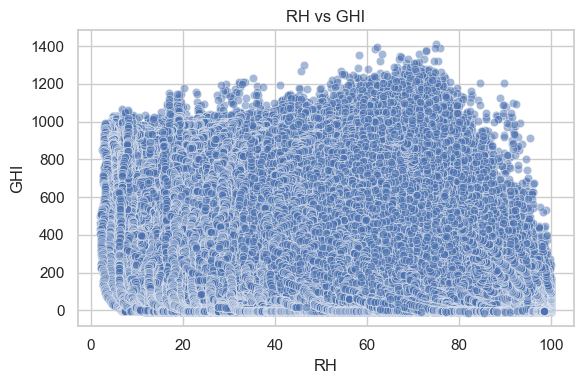

In [5]:
corr_cols = ['GHI','DNI','DHI','TModA','TModB']
plt.figure(figsize=(7,5))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap – Benin")
plt.show()

# Scatter relationship
sns.pairplot(df[['GHI','WS','WSgust','RH','Tamb']], diag_kind='kde')
plt.suptitle("Pairwise Relationships – Benin", y=1.02)
plt.show()
# Scatter plots
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

for x, y in scatter_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
    plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()


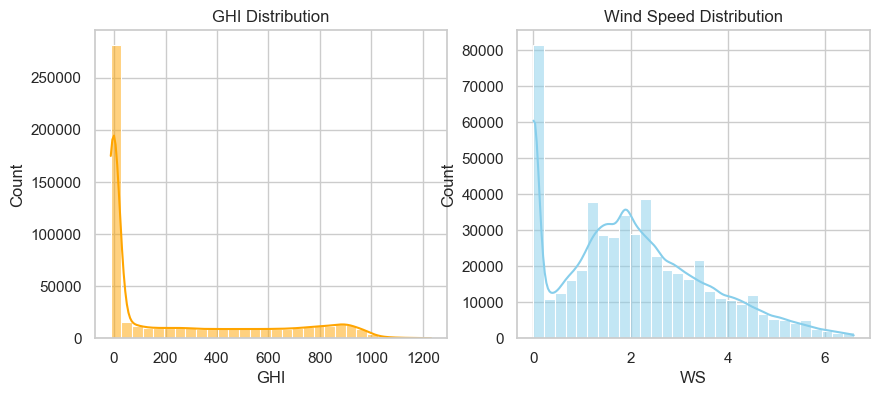

In [ ]:
# --- Part 6: Wind & Distribution Analysis ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['GHI'], bins=30, kde=True, color='orange')
plt.title('GHI Distribution')
plt.subplot(1,2,2)
sns.histplot(df['WS'], bins=30, kde=True, color='skyblue')
plt.title('Wind Speed Distribution')
plt.show()


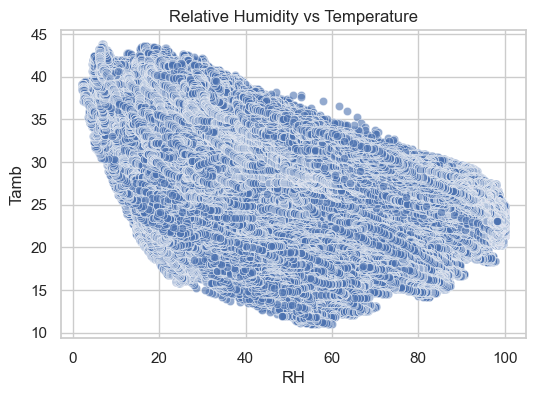

In [27]:
# --- Part 7: Temperature & Humidity Effect ---
plt.figure(figsize=(6,4))
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.6)
plt.title('Relative Humidity vs Temperature')
plt.show()

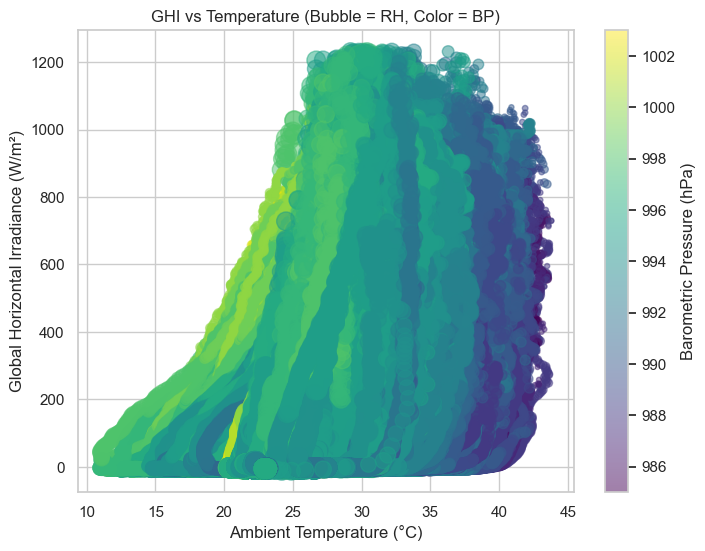

In [28]:
# --- Part 8: Bubble Chart (GHI vs Tamb) ---
plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5,
            c=df['BP'] if 'BP' in df.columns else 'blue',
            cmap='viridis')
plt.title('GHI vs Temperature (Bubble = RH, Color = BP)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
if 'BP' in df.columns:
    plt.colorbar(label='Barometric Pressure (hPa)')
plt.show()


In [29]:
# --- Export Cleaned Dataset ---
df.to_csv('../data/benin_clean.csv', index=False)
print("✅ Cleaned Benin dataset exported successfully.")

✅ Cleaned Benin dataset exported successfully.


## 🧠 Key Insights
1. Benin shows consistent daytime GHI and DNI peaks — strong solar energy potential.
2. Cleaning events improve sensor readings (ModA, ModB) after maintenance.
3. Relative humidity inversely correlates with temperature, typical of dry sunny climates.
4. About 3% of rows removed as outliers — mostly from extreme irradiance readings.
5. Wind conditions remain moderate, supporting stable solar installations.
